# 1: Data preprocessing for California counties dataset
### Lucy Herr - 3/1/24


### Import libraries and data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# full capstone data as of 2/28/24 (source: team drive)
df = pd.read_csv('FULL_capstone_data.csv')

In [4]:
df.shape

(2300, 193)

In [5]:
df.columns

Index(['county_name', 'state', 'Overdose_Rate_X100K', 'PERIOD',
       'Provisional Drug Overdose Deaths', 'crude_rate', 'ST_ABBREV',
       'Rolling12_Deaths', 'BP_Count', 'BP_Weight',
       ...
       'Low4MonthSentiment_Count', 'Avg4MonthSentiment_Count',
       'Rolling5MonthSentiment_Count', 'High5MonthSentiment_Count',
       'Low5MonthSentiment_Count', 'Avg5MonthSentiment_Count',
       'Rolling6MonthSentiment_Count', 'High6MonthSentiment_Count',
       'Low6MonthSentiment_Count', 'Avg6MonthSentiment_Count'],
      dtype='object', length=193)

### Restrict data to California counties only

In [40]:
# check for multiple states in dataset
df['state'].nunique()

1

In [14]:
df['state'].unique()

array(['Colorado', 'California', 'Pennsylvania', 'New Jersey', 'Texas',
       'Florida', 'Massachusetts', 'New York', 'Ohio', 'Michigan'],
      dtype=object)

In [15]:
# limit data to California counties only for modeling
df = df.loc[df['state'] == 'California']

In [16]:
df.shape

(442, 193)

### TO DO: Split dataset into train and test sets
- write fx to repurpose with subsequent data versions
- scikit learn has useful splitting utility: sklearn.model_selection.TimeSeriesSplit
- want at least 30% test minimum, maybe more
- split by %age of data, not arbitrary month cutoff 

In [ ]:
# Check /format dtypes (especially timestamp) prior to splitting

In [116]:
df.PERIOD.unique()

array([202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108,
       202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204,
       202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212,
       202301, 202302, 202303, 202304, 202305, 202306])

In [ ]:
# sklearn.model_selection.TimeSeriesSplit

### Review features and list subsets by type for comparison
#### feature definitions: 
- 'Overdose_Rate_X100K': population over 15/provisional drug overdose deaths x 100k 
- 'Provisional Drug Overdose Deaths': raw total used in calculating above
#### clarify definitions for:
- 'crude_rate'
- 'BP_Count','BP_Weight'
- '90% CI Lower Bound', '90% CI Upper Bound' (are these for 'Median Household Income'?)
- 'Drug_Count', 'Prostitution_Count' (total arrests for that month or previous month?)
- all '[High/Avg/Low/Rolling]_MonthDeaths' - how are these calculated? 
- 'lagged_neighbor_crude_rate','lagged_neighbor_deaths'
- all '___R12' features

In [74]:
# review features and create lists by group for EDA portions
df.columns[0:20]

Index(['county_name', 'state', 'Overdose_Rate_X100K', 'PERIOD',
       'Provisional Drug Overdose Deaths', 'crude_rate', 'ST_ABBREV',
       'Rolling12_Deaths', 'BP_Count', 'BP_Weight', 'YEAR', 'POPESTIMATE',
       'POPEST_MALE', 'POPEST_FEM', 'UNDER5_TOT', 'UNDER5_MALE', 'UNDER5_FEM',
       'AGE513_TOT', 'AGE513_MALE', 'AGE513_FEM'],
      dtype='object')

In [84]:
# list state features (can drop now that data is CA only 
state_feats_to_drop = ['state','ST_ABBREV']

In [85]:
# time features
time_feats = ['YEAR','PERIOD']

In [75]:
df.columns[20:40]

Index(['AGE1417_TOT', 'AGE1417_MALE', 'AGE1417_FEM', 'AGE1824_TOT',
       'AGE1824_MALE', 'AGE1824_FEM', 'AGE16PLUS_TOT', 'AGE16PLUS_MALE',
       'AGE16PLUS_FEM', 'AGE18PLUS_TOT', 'AGE18PLUS_MALE', 'AGE18PLUS_FEM',
       'AGE1544_TOT', 'AGE1544_MALE', 'AGE1544_FEM', 'AGE2544_TOT',
       'AGE2544_MALE', 'AGE2544_FEM', 'AGE4564_TOT', 'AGE4564_MALE'],
      dtype='object')

In [76]:
df.columns[40:60]

Index(['AGE4564_FEM', 'AGE65PLUS_TOT', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM',
       'AGE04_TOT', 'AGE04_MALE', 'AGE04_FEM', 'AGE59_TOT', 'AGE59_MALE',
       'AGE59_FEM', 'AGE1014_TOT', 'AGE1014_MALE', 'AGE1014_FEM',
       'AGE1519_TOT', 'AGE1519_MALE', 'AGE1519_FEM', 'AGE2024_TOT',
       'AGE2024_MALE', 'AGE2024_FEM', 'AGE2529_TOT'],
      dtype='object')

In [77]:
df.columns[60:80]

Index(['AGE2529_MALE', 'AGE2529_FEM', 'AGE3034_TOT', 'AGE3034_MALE',
       'AGE3034_FEM', 'AGE3539_TOT', 'AGE3539_MALE', 'AGE3539_FEM',
       'AGE4044_TOT', 'AGE4044_MALE', 'AGE4044_FEM', 'AGE4549_TOT',
       'AGE4549_MALE', 'AGE4549_FEM', 'AGE5054_TOT', 'AGE5054_MALE',
       'AGE5054_FEM', 'AGE5559_TOT', 'AGE5559_MALE', 'AGE5559_FEM'],
      dtype='object')

In [78]:
df.columns[80:100]

Index(['AGE6064_TOT', 'AGE6064_MALE', 'AGE6064_FEM', 'AGE6569_TOT',
       'AGE6569_MALE', 'AGE6569_FEM', 'AGE7074_TOT', 'AGE7074_MALE',
       'AGE7074_FEM', 'AGE7579_TOT', 'AGE7579_MALE', 'AGE7579_FEM',
       'AGE8084_TOT', 'AGE8084_MALE', 'AGE8084_FEM', 'AGE85PLUS_TOT',
       'AGE85PLUS_MALE', 'AGE85PLUS_FEM', 'MEDIAN_AGE_TOT', 'MEDIAN_AGE_MALE'],
      dtype='object')

In [79]:
df.columns[100:120]

Index(['MEDIAN_AGE_FEM', 'Poverty Estimate, All Ages',
       'Poverty Percent, All Ages', 'Median Household Income',
       '90% CI Lower Bound', '90% CI Upper Bound', 'Drug_Count',
       'Prostitution_Count', 'Theft_Count', 'Rolling2MonthDeaths',
       'High2MonthDeaths', 'Low2MonthDeaths', 'Avg2MonthDeaths',
       'Rolling3MonthDeaths', 'High3MonthDeaths', 'Low3MonthDeaths',
       'Avg3MonthDeaths', 'Rolling4MonthDeaths', 'High4MonthDeaths',
       'Low4MonthDeaths'],
      dtype='object')

In [87]:
# SES columns
ses_feats = ['Poverty Estimate, All Ages','Poverty Percent, All Ages',
             'Median Household Income',
             '90% CI Lower Bound','90% CI Upper Bound']

In [88]:
crime_feats = ['Drug_Count','Prostitution_Count','Theft_Count']

In [80]:
df.columns[120:140]

Index(['Avg4MonthDeaths', 'Rolling5MonthDeaths', 'High5MonthDeaths',
       'Low5MonthDeaths', 'Avg5MonthDeaths', 'Rolling6MonthDeaths',
       'High6MonthDeaths', 'Low6MonthDeaths', 'Avg6MonthDeaths',
       'lagged_neighbor_deaths', 'lagged_neighbor_crude_rate',
       'Rolling2MonthR12', 'High2MonthR12', 'Low2MonthR12', 'Avg2MonthR12',
       'Rolling3MonthR12', 'High3MonthR12', 'Low3MonthR12', 'Avg3MonthR12',
       'Rolling4MonthR12'],
      dtype='object')

In [89]:
# list time series deaths features 
ts_death_feats = df.columns[109:129]

In [90]:
lagged_neighbor_feats = ['lagged_neighbor_deaths', 'lagged_neighbor_crude_rate']

In [81]:
df.columns[140:160]

Index(['High4MonthR12', 'Low4MonthR12', 'Avg4MonthR12', 'Rolling5MonthR12',
       'High5MonthR12', 'Low5MonthR12', 'Avg5MonthR12', 'Rolling6MonthR12',
       'High6MonthR12', 'Low6MonthR12', 'Avg6MonthR12', 'AVG_SENTIMENT_SCORE',
       'AVG_SENTIMENT_COUNT', 'Rolling2MonthSentiment_Score',
       'High2MonthSentiment_Score', 'Low2MonthSentiment_Score',
       'Avg2MonthSentiment_Score', 'Rolling3MonthSentiment_Score',
       'High3MonthSentiment_Score', 'Low3MonthSentiment_Score'],
      dtype='object')

In [91]:
# list r12 features
r12_feats = df.columns[132:152]

In [82]:
df.columns[160:180]

Index(['Avg3MonthSentiment_Score', 'Rolling4MonthSentiment_Score',
       'High4MonthSentiment_Score', 'Low4MonthSentiment_Score',
       'Avg4MonthSentiment_Score', 'Rolling5MonthSentiment_Score',
       'High5MonthSentiment_Score', 'Low5MonthSentiment_Score',
       'Avg5MonthSentiment_Score', 'Rolling6MonthSentiment_Score',
       'High6MonthSentiment_Score', 'Low6MonthSentiment_Score',
       'Avg6MonthSentiment_Score', 'Rolling2MonthSentiment_Count',
       'High2MonthSentiment_Count', 'Low2MonthSentiment_Count',
       'Avg2MonthSentiment_Count', 'Rolling3MonthSentiment_Count',
       'High3MonthSentiment_Count', 'Low3MonthSentiment_Count'],
      dtype='object')

In [83]:
df.columns[180:]

Index(['Avg3MonthSentiment_Count', 'Rolling4MonthSentiment_Count',
       'High4MonthSentiment_Count', 'Low4MonthSentiment_Count',
       'Avg4MonthSentiment_Count', 'Rolling5MonthSentiment_Count',
       'High5MonthSentiment_Count', 'Low5MonthSentiment_Count',
       'Avg5MonthSentiment_Count', 'Rolling6MonthSentiment_Count',
       'High6MonthSentiment_Count', 'Low6MonthSentiment_Count',
       'Avg6MonthSentiment_Count'],
      dtype='object')

In [92]:
# list all population deomographic features (population, age, gender) 
pop_demo_features = df.columns[11:101]

In [39]:
# list all sentiment features
sentiment_features = df.columns[151:]

#### Check missing values

In [65]:
def make_null_df(df):
    # calculate percentage of nulls for each column
    percent_missing = df.isnull().sum() * 100 / len(df)
    # return df of results
    results_df = pd.DataFrame({'feature_name': percent_missing.index, 'percent_null': percent_missing.values})
    results_df.sort_values(by='percent_null',ascending=False, inplace=True)
    results_df.reset_index(drop=True,inplace=True)
    return results_df

In [66]:
null_df = make_null_df(df)
null_df

,feature_name,percent_null
0,Avg6MonthSentiment_Count,20.135747
1,High2MonthSentiment_Score,20.135747
2,Rolling5MonthSentiment_Score,20.135747
3,Avg4MonthSentiment_Score,20.135747
4,Low4MonthSentiment_Score,20.135747
...,...,...
188,AGE3539_FEM,0.000000
189,AGE4044_TOT,0.000000
190,AGE4044_MALE,0.000000
191,AGE4044_FEM,0.000000


In [67]:
null_df_non0 = null_df[null_df['percent_null']>0]

In [72]:
null_df_non0.shape

(92, 2)

In [70]:
null_df_non0[0:20]

,feature_name,percent_null
0,Avg6MonthSentiment_Count,20.135747
1,High2MonthSentiment_Score,20.135747
2,Rolling5MonthSentiment_Score,20.135747
3,Avg4MonthSentiment_Score,20.135747
4,Low4MonthSentiment_Score,20.135747
5,Rolling4MonthSentiment_Score,20.135747
6,Avg3MonthSentiment_Score,20.135747
7,Low3MonthSentiment_Score,20.135747
8,High3MonthSentiment_Score,20.135747
9,Rolling3MonthSentiment_Score,20.135747


In [71]:
null_df_non0[20:40]

,feature_name,percent_null
20,90% CI Upper Bound,20.135747
21,Drug_Count,20.135747
22,Prostitution_Count,20.135747
23,Theft_Count,20.135747
24,High5MonthSentiment_Score,20.135747
25,High4MonthSentiment_Score,20.135747
26,Avg5MonthSentiment_Score,20.135747
27,Rolling6MonthSentiment_Count,20.135747
28,Low5MonthSentiment_Count,20.135747
29,High5MonthSentiment_Count,20.135747


In [73]:
null_df_non0[40:60]

,feature_name,percent_null
40,High3MonthSentiment_Count,20.135747
41,Rolling3MonthSentiment_Count,20.135747
42,Avg2MonthSentiment_Count,20.135747
43,Low2MonthSentiment_Count,20.135747
44,High2MonthSentiment_Count,20.135747
45,Rolling2MonthSentiment_Count,20.135747
46,Avg6MonthSentiment_Score,20.135747
47,Low6MonthSentiment_Score,20.135747
48,High6MonthSentiment_Score,20.135747
49,Avg5MonthSentiment_Count,20.135747


In [98]:
# inspect features (mostly sentiment scores) with consistently high proportion (~20.1%) nulls
high_null_feats = null_df_non0.feature_name[0:50]

In [100]:
def null_values_percentage_by_county_and_period(df, column_names):
    """
    # function that filters pandas df by individual columns and returns percentages of rows
    # with missing values by 'county_name' and 'PERIOD'
    # - 'column_names' argument: list of column names to inspect
    # returns dict of keys = column name, values = dfs for column name
    """
    result = {}
    for column_name in column_names:
        # filter df to null values in the specified column
        filtered_df = df[df[column_name].isnull()]
        # group by 'county_name' and 'PERIOD' to obtain null row counts
        grouped = filtered_df.groupby(['county_name', 'PERIOD']).size().reset_index(name='count_nulls')
        # group df by 'county_name' and 'PERIOD' to get total counts
        total_counts = df.groupby(['county_name', 'PERIOD']).size().reset_index(name='total_counts')
        # merge counts to calculate percentages
        merged_df = pd.merge(grouped, total_counts, on=['county_name', 'PERIOD'])
        merged_df['null_percentage'] = (merged_df['count_nulls'] / merged_df['total_counts']) * 100
        # select relevant columns
        final_df = merged_df[['county_name', 'PERIOD', 'null_percentage']]
        result[column_name] = final_df
    return result


In [109]:
missing_dict = null_values_percentage_by_county_and_period(df,high_null_feats)


In [105]:
missing_dict['Avg6MonthSentiment_Count'].county_name.unique()

array(['ALAMEDA', 'CONTRA COSTA', 'FRESNO', 'KERN', 'LOS ANGELES',
       'ORANGE', 'RIVERSIDE', 'SACRAMENTO', 'SAN BERNARDINO', 'SAN DIEGO',
       'SAN FRANCISCO', 'SAN JOAQUIN', 'SANTA CLARA', 'STANISLAUS',
       'VENTURA'], dtype=object)

In [106]:
missing_dict['High2MonthSentiment_Score'].county_name.unique()

array(['ALAMEDA', 'CONTRA COSTA', 'FRESNO', 'KERN', 'LOS ANGELES',
       'ORANGE', 'RIVERSIDE', 'SACRAMENTO', 'SAN BERNARDINO', 'SAN DIEGO',
       'SAN FRANCISCO', 'SAN JOAQUIN', 'SANTA CLARA', 'STANISLAUS',
       'VENTURA'], dtype=object)

In [113]:
def make_feature_subset_pearson_corr_heatmap(pandas_df, str_to_select_cols, plot_title):
    """
    generate heatmap of Pearson correlation coefficients for subset of features in df
    - str_to_select_cols: string within column name subtroup that contain this substring. These columns form the feature subset.

    """
    # select cols containing string that identifies feature subset
    heatmap_columns = [col for col in pandas_df.columns if str_to_select_cols in col]
    # subset those columns in df
    df_filtered = pandas_df[heatmap_columns]
    # calculate correlation matrix
    corr_matrix = df_filtered.corr()
    # set repeated values in upper triangle of correlation matrix to NaN (simplify plot)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix[mask] = np.nan
    # plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", mask=mask)
    plt.title(plot_title)
    plt.show()

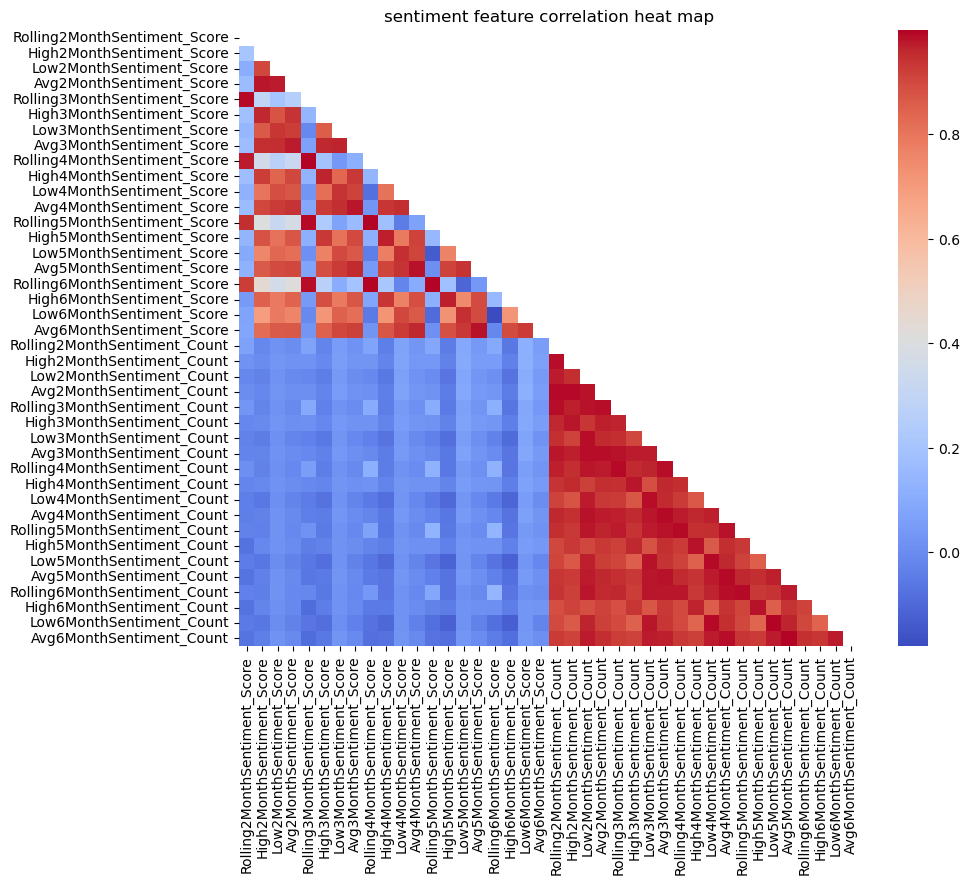

In [114]:
make_feature_subset_pearson_corr_heatmap(df, "Sentiment","sentiment feature correlation heat map")

In [130]:
filter_cols = [col for col in df.columns if "" in col]
# subset those columns in df
df_filtered = df[filter_cols]
corr_matrix = df_filtered.corr()
corr_matrix_reset = corr_matrix.reset_index().rename(columns={'index': 'Feature_A'})
corr_melted = corr_matrix_reset.melt(id_vars='Feature_A', var_name='Feature_B', value_name='Correlation')
corr_melted = corr_melted[corr_melted['Feature_A'] != corr_melted['Feature_B']]
corr_melted['sorted_features'] = corr_melted.apply(lambda x: '-'.join(sorted([x['Feature_A'], x['Feature_B']])), axis=1)
corr_melted.drop_duplicates(subset='sorted_features', inplace=True)
corr_melted.drop('sorted_features', axis=1, inplace=True)
corr_melted.reset_index(drop=True, inplace=True)
corr_melted.sort_values(by='Correlation', ascending=False, inplace=True)

In [132]:
corr_melted[0:20]

,Feature_A,Feature_B,Correlation
405,Rolling6MonthSentiment_Score,Rolling5MonthSentiment_Score,0.999690
287,Rolling5MonthSentiment_Score,Rolling4MonthSentiment_Score,0.999361
153,Rolling4MonthSentiment_Score,Rolling3MonthSentiment_Score,0.998308
768,Low6MonthSentiment_Count,Low5MonthSentiment_Count,0.997932
291,Rolling6MonthSentiment_Score,Rolling4MonthSentiment_Score,0.997852
773,Avg6MonthSentiment_Count,Avg5MonthSentiment_Count,0.995596
747,Avg5MonthSentiment_Count,Avg4MonthSentiment_Count,0.994702
157,Rolling5MonthSentiment_Score,Rolling3MonthSentiment_Score,0.994350
755,Rolling6MonthSentiment_Count,Rolling5MonthSentiment_Count,0.993967
705,Avg4MonthSentiment_Count,Avg3MonthSentiment_Count,0.993097


In [133]:
corr_melted[20:40]

,Feature_A,Feature_B,Correlation
644,Rolling3MonthSentiment_Count,Avg2MonthSentiment_Count,0.987876
630,Low3MonthSentiment_Count,Low2MonthSentiment_Count,0.987614
593,Rolling3MonthSentiment_Count,Rolling2MonthSentiment_Count,0.987476
631,Avg3MonthSentiment_Count,Low2MonthSentiment_Count,0.987199
702,Rolling4MonthSentiment_Count,Avg3MonthSentiment_Count,0.986716
590,High2MonthSentiment_Count,Rolling2MonthSentiment_Count,0.986507
751,Avg6MonthSentiment_Count,Avg4MonthSentiment_Count,0.986277
748,Rolling6MonthSentiment_Count,Avg4MonthSentiment_Count,0.986212
627,Avg2MonthSentiment_Count,Low2MonthSentiment_Count,0.985561
483,Avg6MonthSentiment_Score,Avg5MonthSentiment_Score,0.984988


In [134]:
corr_melted[40:60]

,Feature_A,Feature_B,Correlation
255,Avg4MonthSentiment_Score,Avg3MonthSentiment_Score,0.980831
632,Rolling4MonthSentiment_Count,Low2MonthSentiment_Count,0.980677
700,Low6MonthSentiment_Count,Low3MonthSentiment_Count,0.980188
678,High4MonthSentiment_Count,High3MonthSentiment_Count,0.979862
636,Rolling5MonthSentiment_Count,Low2MonthSentiment_Count,0.979372
710,Rolling6MonthSentiment_Count,Avg3MonthSentiment_Count,0.979329
721,Rolling6MonthSentiment_Count,Rolling4MonthSentiment_Count,0.978935
693,Avg4MonthSentiment_Count,Low3MonthSentiment_Count,0.978080
698,Rolling6MonthSentiment_Count,Low3MonthSentiment_Count,0.977800
596,Avg3MonthSentiment_Count,Rolling2MonthSentiment_Count,0.977728


In [135]:
corr_melted[60:80]

,Feature_A,Feature_B,Correlation
770,Rolling6MonthSentiment_Count,Avg5MonthSentiment_Count,0.975630
667,Rolling5MonthSentiment_Count,Rolling3MonthSentiment_Count,0.975575
743,Avg6MonthSentiment_Count,Low4MonthSentiment_Count,0.975436
591,Low2MonthSentiment_Count,Rolling2MonthSentiment_Count,0.975389
648,Rolling4MonthSentiment_Count,Avg2MonthSentiment_Count,0.975206
77,Avg2MonthSentiment_Score,Low2MonthSentiment_Score,0.975150
701,Avg6MonthSentiment_Count,Low3MonthSentiment_Count,0.974898
651,Avg4MonthSentiment_Count,Avg2MonthSentiment_Count,0.974373
117,Avg3MonthSentiment_Score,Avg2MonthSentiment_Score,0.974287
643,Avg6MonthSentiment_Count,Low2MonthSentiment_Count,0.974164


In [137]:
corr_melted[80:100]

,Feature_A,Feature_B,Correlation
735,Avg4MonthSentiment_Count,Low4MonthSentiment_Count,0.969524
638,Low5MonthSentiment_Count,Low2MonthSentiment_Count,0.969471
614,Avg3MonthSentiment_Count,High2MonthSentiment_Count,0.969158
666,Avg4MonthSentiment_Count,Rolling3MonthSentiment_Count,0.968872
318,High5MonthSentiment_Score,High4MonthSentiment_Score,0.967861
660,High3MonthSentiment_Count,Rolling3MonthSentiment_Count,0.967360
642,Low6MonthSentiment_Count,Low2MonthSentiment_Count,0.967094
652,Rolling5MonthSentiment_Count,Avg2MonthSentiment_Count,0.965739
690,Rolling4MonthSentiment_Count,Low3MonthSentiment_Count,0.965622
740,Rolling6MonthSentiment_Count,Low4MonthSentiment_Count,0.964894


In [140]:
corr_melted[100:120]

,Feature_A,Feature_B,Correlation
42,High3MonthSentiment_Score,High2MonthSentiment_Score,0.960034
746,Low5MonthSentiment_Count,Avg4MonthSentiment_Count,0.959875
682,High5MonthSentiment_Count,High3MonthSentiment_Count,0.959724
381,Avg6MonthSentiment_Score,Avg4MonthSentiment_Score,0.959631
671,Rolling6MonthSentiment_Count,Rolling3MonthSentiment_Count,0.958881
186,Avg3MonthSentiment_Score,High3MonthSentiment_Score,0.958328
646,Low3MonthSentiment_Count,Avg2MonthSentiment_Count,0.957960
656,Rolling6MonthSentiment_Count,Avg2MonthSentiment_Count,0.957546
704,Low4MonthSentiment_Count,Avg3MonthSentiment_Count,0.956764
677,Rolling4MonthSentiment_Count,High3MonthSentiment_Count,0.955895


In [141]:
corr_melted[120:140]

,Feature_A,Feature_B,Correlation
661,Low3MonthSentiment_Count,Rolling3MonthSentiment_Count,0.952503
601,Rolling5MonthSentiment_Count,Rolling2MonthSentiment_Count,0.952048
736,Rolling5MonthSentiment_Count,Low4MonthSentiment_Count,0.951467
345,Avg4MonthSentiment_Score,Low4MonthSentiment_Score,0.951382
714,High4MonthSentiment_Count,Rolling4MonthSentiment_Count,0.950606
649,High4MonthSentiment_Count,Avg2MonthSentiment_Count,0.950597
223,Avg4MonthSentiment_Score,Low3MonthSentiment_Score,0.950102
760,Avg5MonthSentiment_Count,High5MonthSentiment_Count,0.949606
615,Rolling4MonthSentiment_Count,High2MonthSentiment_Count,0.949188
670,Avg5MonthSentiment_Count,Rolling3MonthSentiment_Count,0.948465


In [142]:
null_feat_list = null_df_non0.feature_name

def make_sorted_pwise_corr_df(df,col_name_list): 
    # subset those columns in df
    df_filtered = df[col_name_list]
    corr_matrix = df_filtered.corr()
    corr_matrix_reset = corr_matrix.reset_index().rename(columns={'index': 'feature_A'})
    corr_melted = corr_matrix_reset.melt(id_vars='feature_A', var_name='feature_B', value_name='correlation')
    corr_melted = corr_melted[corr_melted['feature_A'] != corr_melted['feature_B']]
    corr_melted['sorted_features'] = corr_melted.apply(lambda x: '-'.join(sorted([x['feature_A'], x['feature_B']])), axis=1)
    corr_melted.drop_duplicates(subset='sorted_features', inplace=True)
    corr_melted.drop('sorted_features', axis=1, inplace=True)
    corr_melted.reset_index(drop=True, inplace=True)
    corr_melted.sort_values(by='correlation', ascending=False, inplace=True)
    return corr_melted

null_corr_df = make_sorted_pwise_corr_df(df,null_feat_list)
null_corr_df

,feature_A,feature_B,correlation
3627,Avg5MonthDeaths,Rolling5MonthDeaths,1.000000
4082,Avg3MonthDeaths,Rolling3MonthDeaths,1.000000
3957,Rolling4MonthDeaths,Avg4MonthDeaths,1.000000
4160,Avg2MonthDeaths,Rolling2MonthDeaths,1.000000
4182,Rolling2MonthR12,Avg2MonthR12,1.000000
...,...,...,...
1541,lagged_neighbor_deaths,Median Household Income,-0.372062
1684,lagged_neighbor_deaths,90% CI Upper Bound,-0.380297
1413,90% CI Upper Bound,"Poverty Percent, All Ages",-0.825428
1411,Median Household Income,"Poverty Percent, All Ages",-0.831467
